In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Cargar y filtrar datos para EDA en mujeres
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/MODELOS MONOGRAFIA/otrasinfeccionesMonografia.csv", sep=";")
data_eda_mujeres = data[data['tipo'] == 'EDA'][['fecha', 'mujeres']]
data_eda_mujeres['fecha'] = pd.to_datetime(data_eda_mujeres['fecha'], dayfirst=True)
data_eda_mujeres = data_eda_mujeres.sort_values(by='fecha')
data_eda_mujeres.set_index('fecha', inplace=True)

# Prueba de Dickey-Fuller para verificar estacionaridad
result_mujeres = adfuller(data_eda_mujeres['mujeres'])
print('Prueba de Dickey-Fuller para Mujeres:')
print(f'Estadístico de prueba: {result_mujeres[0]:.4f}')
print(f'P-valor: {result_mujeres[1]:.4f}')
for key, value in result_mujeres[4].items():
    print(f'Valor Crítico {key}: {value:.4f}')

Mounted at /content/drive
Prueba de Dickey-Fuller para Mujeres:
Estadístico de prueba: -3.5375
P-valor: 0.0071
Valor Crítico 1%: -3.4530
Valor Crítico 5%: -2.8715
Valor Crítico 10%: -2.5721


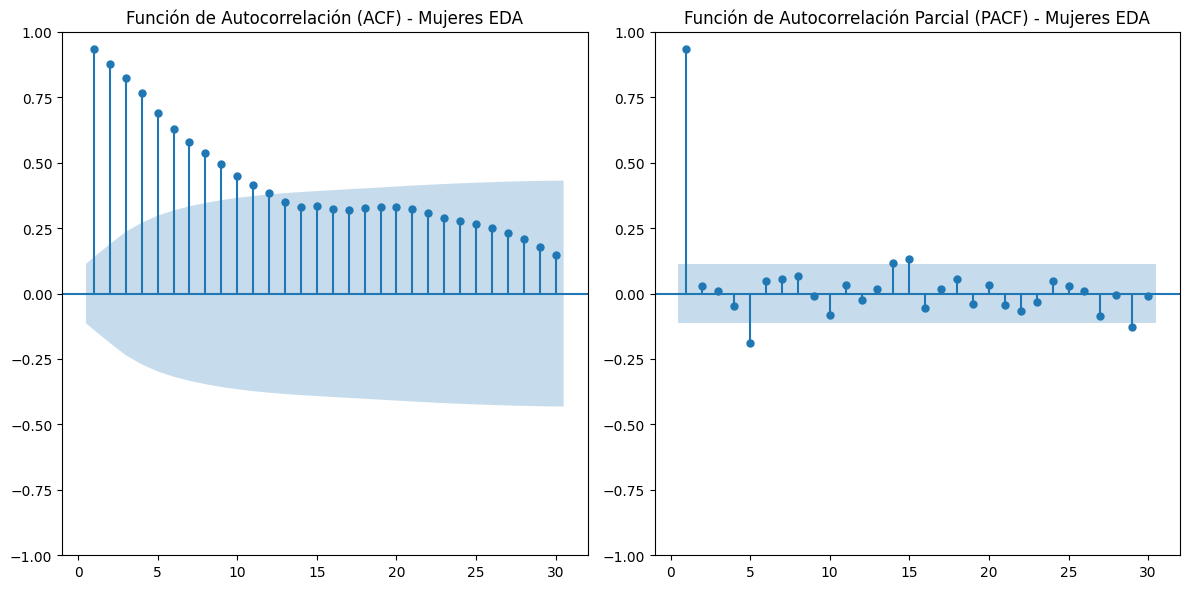

In [ ]:
# Diferenciar la serie (si es necesario) para graficar ACF y PACF
# En este caso, la serie es estacionaria, por lo que no diferenciamos.
data_eda_mujeres_diff = data_eda_mujeres['mujeres']

# Graficar ACF y PACF
plt.figure(figsize=(12, 6))

# Gráfico de ACF
plt.subplot(1, 2, 1)
plot_acf(data_eda_mujeres_diff, lags=30, zero=False, ax=plt.gca())
plt.title("Función de Autocorrelación (ACF) - Mujeres EDA")

# Gráfico de PACF
plt.subplot(1, 2, 2)
plot_pacf(data_eda_mujeres_diff, lags=30, zero=False, ax=plt.gca())
plt.title("Función de Autocorrelación Parcial (PACF) - Mujeres EDA")

plt.tight_layout()
plt.show()

# ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                mujeres   No. Observations:                  251
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1389.207
Date:                Mon, 02 Dec 2024   AIC                           2786.414
Time:                        02:31:42   BIC                           2800.515
Sample:                    01-07-2019   HQIC                          2792.089
                         - 10-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.0712     62.106      7.520      0.000     345.345     588.798
ar.L1          0.9337      0.026     35.493      0.000       0.882       0.985
ma.L1          0.0057      0.059      0.098      0.9

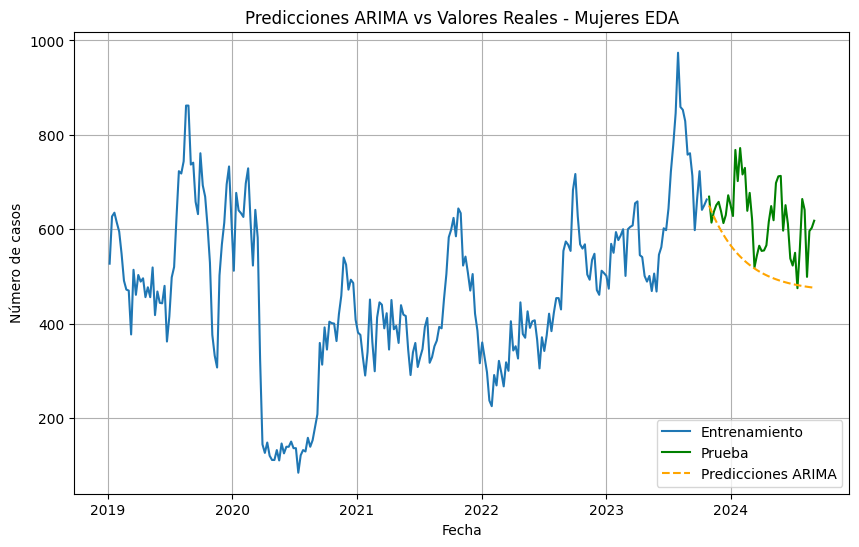

MAE: 100.61
RMSE: 120.62
MAPE: 15.42%
sMAPE: 17.24%


In [ ]:


# Dividir los datos en entrenamiento (85%) y prueba (15%)
train_size = int(len(data_eda_mujeres) * 0.85)
train_mujeres = data_eda_mujeres['mujeres'][:train_size]
test_mujeres = data_eda_mujeres['mujeres'][train_size:]

# Ajustar modelo ARIMA (1, 1, 0)
model_arima = ARIMA(train_mujeres, order=(1, 0, 1))
arima_result = model_arima.fit()

# Resumen del modelo ARIMA
print(arima_result.summary())

# Predicciones para el conjunto de prueba
predictions_arima = arima_result.forecast(steps=len(test_mujeres))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(train_mujeres.index, train_mujeres, label='Entrenamiento')
plt.plot(test_mujeres.index, test_mujeres, label='Prueba', color='green')
plt.plot(test_mujeres.index, predictions_arima, color='orange', linestyle='--', label='Predicciones ARIMA')
plt.title("Predicciones ARIMA vs Valores Reales - Mujeres EDA")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

# Evaluar métricas
mae_arima = mean_absolute_error(test_mujeres, predictions_arima)
rmse_arima = np.sqrt(mean_squared_error(test_mujeres, predictions_arima))
mape_arima = mean_absolute_percentage_error(test_mujeres, predictions_arima) * 100
smape_arima = 100 * np.mean(2 * np.abs(test_mujeres - predictions_arima) / (np.abs(test_mujeres) + np.abs(predictions_arima)))

print(f'MAE: {mae_arima:.2f}')
print(f'RMSE: {rmse_arima:.2f}')
print(f'MAPE: {mape_arima:.2f}%')
print(f'sMAPE: {smape_arima:.2f}%')

# SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                            mujeres   No. Observations:                  251
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1391.842
Date:                            Mon, 02 Dec 2024   AIC                           2793.684
Time:                                    02:31:48   BIC                           2811.311
Sample:                                01-07-2019   HQIC                          2800.777
                                     - 10-23-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9926      0.008    123.348      0.000       0.977       1.008
ma.L1         -0.0158      0.052   

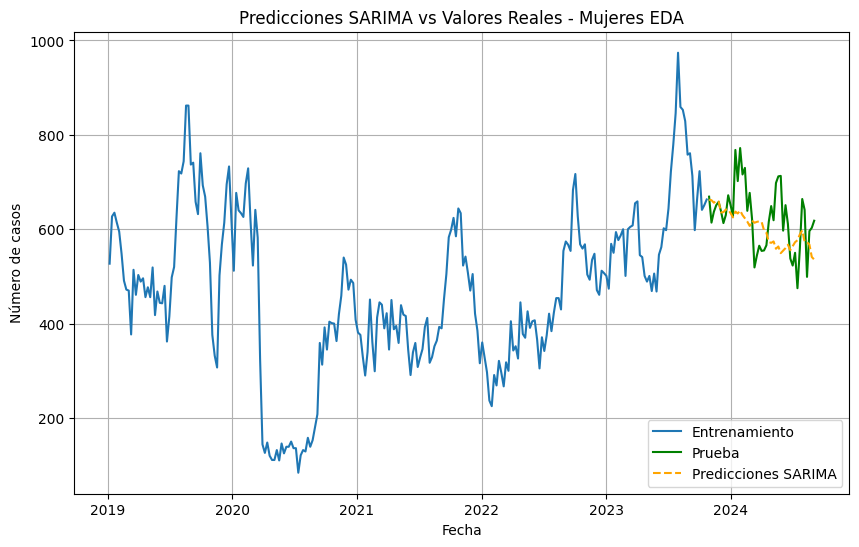

MAE: 56.17
RMSE: 70.09
MAPE: 8.88%
sMAPE: 9.15%


In [ ]:


# Ajustar modelo SARIMA (1, 1, 0) x (1, 1, 0, 30)
model_sarima = SARIMAX(train_mujeres, order=(1, 0, 1), seasonal_order=(1, 0, 1, 52))
sarima_result = model_sarima.fit()

# Resumen del modelo SARIMA
print(sarima_result.summary())

# Predicciones para el conjunto de prueba
predictions_sarima = sarima_result.forecast(steps=len(test_mujeres))

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(train_mujeres.index, train_mujeres, label='Entrenamiento')
plt.plot(test_mujeres.index, test_mujeres, label='Prueba', color='green')
plt.plot(test_mujeres.index, predictions_sarima, color='orange', linestyle='--', label='Predicciones SARIMA')
plt.title("Predicciones SARIMA vs Valores Reales - Mujeres EDA")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)
plt.show()

# Evaluar métricas
mae_sarima = mean_absolute_error(test_mujeres, predictions_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test_mujeres, predictions_sarima))
mape_sarima = mean_absolute_percentage_error(test_mujeres, predictions_sarima) * 100
smape_sarima = 100 * np.mean(2 * np.abs(test_mujeres - predictions_sarima) / (np.abs(test_mujeres) + np.abs(predictions_sarima)))

print(f'MAE: {mae_sarima:.2f}')
print(f'RMSE: {rmse_sarima:.2f}')
print(f'MAPE: {mape_sarima:.2f}%')
print(f'sMAPE: {smape_sarima:.2f}%')

In [ ]:
# prompt: Crear DataFrame comparativo de los valores reales y predichos para ARIMA y SARIMA

# Crear un DataFrame para comparar los resultados
comparacion_modelos = pd.DataFrame({
    #'Fecha': test_mujeres.index,
    'Real': test_mujeres.values,
    'Predicción ARIMA': predictions_arima,
    'Predicción SARIMA': predictions_sarima
})

# Mostrar el DataFrame
comparacion_modelos

,Real,Predicción ARIMA,Predicción SARIMA
2023-10-30,669,650.154451,662.442265
2023-11-06,614,638.021846,661.487634
2023-11-13,637,626.693248,656.133433
2023-11-20,651,616.115376,660.279705
2023-11-27,658,606.238481,658.867587
2023-12-04,638,597.016110,635.679692
2023-12-11,613,588.404889,636.122295
2023-12-18,630,580.364318,641.663942
2023-12-25,672,572.856582,641.739234
2024-01-01,651,565.846371,634.058894


In [ ]:
# prompt: realiza 8 predicciones a futuro

# Generar 8 predicciones a futuro con el modelo SARIMA
future_steps = 8
future_predictions_sarima_ira_mujeres = sarima_result.get_forecast(steps=future_steps)

# Obtener las predicciones y los intervalos de confianza
future_predictions = future_predictions_sarima_ira_mujeres.predicted_mean
confidence_intervals = future_predictions_sarima_ira_mujeres.conf_int()

# Imprimir las predicciones a futuro
print("Predicciones a futuro (SARIMA):")
print(future_predictions)

# Crear un DataFrame para las predicciones a futuro
future_dates = pd.date_range(start=data_eda_mujeres.index[-1] + pd.DateOffset(1), periods=future_steps, freq='W')  # Ajusta la frecuencia según sea necesario
future_df = pd.DataFrame({
    'Fecha': future_dates,
    'Predicciones SARIMA': future_predictions.round()
})

# Imprimir el DataFrame de predicciones a futuro
future_df

Predicciones a futuro (SARIMA):
2023-10-30    662.442265
2023-11-06    661.487634
2023-11-13    656.133433
2023-11-20    660.279705
2023-11-27    658.867587
2023-12-04    635.679692
2023-12-11    636.122295
2023-12-18    641.663942
Freq: W-MON, Name: predicted_mean, dtype: float64


,Fecha,Predicciones SARIMA
2023-10-30,2024-09-08,662.0
2023-11-06,2024-09-15,661.0
2023-11-13,2024-09-22,656.0
2023-11-20,2024-09-29,660.0
2023-11-27,2024-10-06,659.0
2023-12-04,2024-10-13,636.0
2023-12-11,2024-10-20,636.0
2023-12-18,2024-10-27,642.0


In [ ]:

# Valores reales a futuro
real_values = [890, 773, 734, 768, 621, 633, 581, 548]

# Obtener las predicciones del modelo desde el DataFrame future_df
# Asumiendo que 'future_df' existe en el contexto de ejecución del código anterior.
# Ajusta esto según el nombre real de tu DataFrame y la columna de predicciones

# Asegúrate de que future_df esté definido
try:
    future_predictions = future_df['Predicciones SARIMA'].values
except NameError:
    print("Error: 'future_df' no está definida. Asegúrate de que el código que genera el DataFrame future_df se haya ejecutado correctamente.")
    future_predictions = [0] * len(real_values) #valor por defecto para prevenir error

#Evaluar solo los 8 primeros valores predichos, descartar el noveno
future_predictions = future_predictions[:8]


# Calcular métricas de evaluación
mae = np.mean(np.abs(real_values[:8] - future_predictions))
rmse = np.sqrt(np.mean((real_values[:8] - future_predictions)**2))
mape = np.mean(np.abs((real_values[:8] - future_predictions) / real_values[:8])) * 100
smape = 100 * np.mean(2 * np.abs(real_values[:8] - future_predictions) / (np.abs(real_values[:8]) + np.abs(future_predictions)))


# Crear un DataFrame para comparar
comparison_df = pd.DataFrame({
    'Real': real_values[:8],
    'Predicción': future_predictions
})

print(comparison_df)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')
print(f'sMAPE: {smape:.2f}%')

   Real  Predicción
0   890       662.0
1   773       661.0
2   734       656.0
3   768       660.0
4   621       659.0
5   633       636.0
6   581       636.0
7   548       642.0
MAE: 89.50
RMSE: 109.31
MAPE: 12.25%
sMAPE: 12.82%


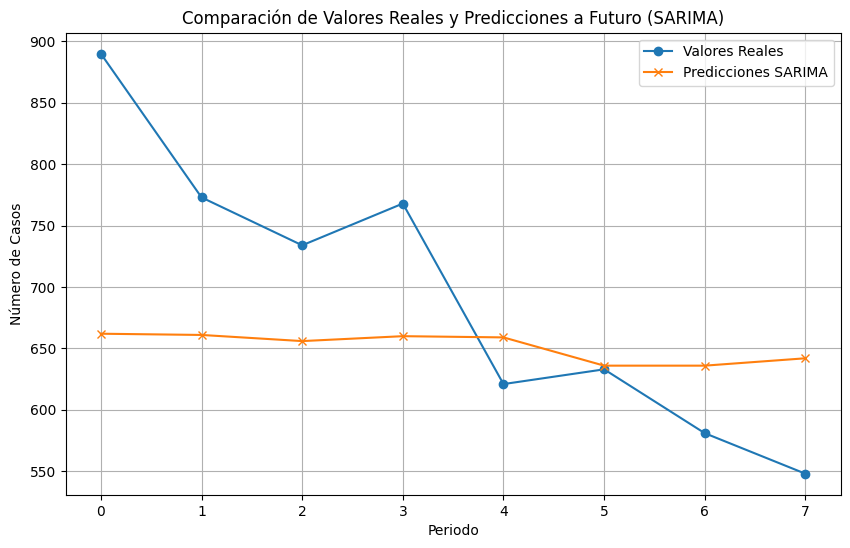

In [ ]:
# prompt: grafica la comparacion

# Gráfica de comparación entre valores reales y predicciones a futuro
plt.figure(figsize=(10, 6))
plt.plot(range(len(real_values[:8])), real_values[:8], label="Valores Reales", marker='o')
plt.plot(range(len(future_predictions)), future_predictions, label="Predicciones SARIMA", marker='x')
plt.title("Comparación de Valores Reales y Predicciones a Futuro (SARIMA)")
plt.xlabel("Periodo")
plt.ylabel("Número de Casos")
plt.legend()
plt.grid(True)
plt.show()